# Continues Assesment - III 

### Introduction to Machine Learning 
 ICT20963 - DILSHAN

Import All the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### 01. Read the file " Pre_processed_data.pkl" and create the dataframe.

In [2]:
data = pd.read_pickle("Pre_processed_data.pkl")

Just Display the DataFrame and Have an Idea about the Data of that DataFrame containing

In [3]:
data

,No,RESULT_QUALITY,INDT,R_SHTCNT,R_DIECD,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,...,R_SHTHTR25TMP,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX
0,1,Good,2017/1/16 8:48,5,Molding_A,35.18,5.76,3.42,187.0,31.0,...,223.6,220.7,223.5,220.6,231.7,230.3,231.2,230.4,223.4,79.23624
1,2,Good,2017/1/16 8:49,6,Molding_A,35.16,6.16,3.43,187.0,30.9,...,221.9,220.5,222.0,220.6,230.5,230.3,228.6,230.3,223.4,79.23624
2,3,Good,2017/1/16 8:49,7,Molding_A,35.20,6.48,3.43,187.0,31.0,...,222.3,220.6,222.4,220.6,230.8,230.4,230.3,230.4,223.4,79.23624
3,4,Good,2017/1/16 8:51,8,Molding_A,69.75,6.40,3.42,187.0,31.0,...,219.4,219.8,218.7,220.0,228.2,229.8,227.5,229.9,222.1,79.23624
4,5,Good,2017/1/16 8:56,9,Molding_A,38.11,6.49,3.42,187.0,30.9,...,221.7,220.0,222.6,219.9,231.4,230.0,231.2,229.7,220.2,79.23624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40683,40684,Good,2017/10/24 9:24,65,Molding_A,35.35,7.67,3.42,186.9,30.9,...,221.4,220.1,221.2,220.0,231.0,230.0,231.4,230.0,220.2,74.00000
40684,40685,Good,2017/10/24 9:25,66,Molding_A,35.36,7.66,3.40,186.9,30.9,...,221.6,220.1,221.3,220.0,231.0,230.0,232.1,229.9,220.0,76.00000
40685,40686,Good,2017/10/24 9:25,67,Molding_A,35.30,7.66,3.41,186.9,30.9,...,221.1,220.0,221.1,220.0,230.6,230.0,231.1,230.0,220.0,77.00000
40686,40687,Good,2017/10/24 9:26,68,Molding_A,35.28,7.69,3.42,186.9,30.9,...,220.2,220.0,220.3,220.0,230.1,230.0,229.7,230.0,219.8,79.00000


Get the Count of Good and ColorUnevenness

In [4]:
data['RESULT_QUALITY'].value_counts()

Good               39736
ColorUnevenness      412
Name: RESULT_QUALITY, dtype: int64

Seperate those data into Two ("Good" and "ColorUnevenness") and then Create new 2 Variables and add into it

In [5]:
good_data = data[data['RESULT_QUALITY'] == 'Good']
color_unevenness_data = data[data['RESULT_QUALITY'] == 'ColorUnevenness']

Just Look at Good Data

In [6]:
good_data

,No,RESULT_QUALITY,INDT,R_SHTCNT,R_DIECD,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,...,R_SHTHTR25TMP,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX
0,1,Good,2017/1/16 8:48,5,Molding_A,35.18,5.76,3.42,187.0,31.0,...,223.6,220.7,223.5,220.6,231.7,230.3,231.2,230.4,223.4,79.23624
1,2,Good,2017/1/16 8:49,6,Molding_A,35.16,6.16,3.43,187.0,30.9,...,221.9,220.5,222.0,220.6,230.5,230.3,228.6,230.3,223.4,79.23624
2,3,Good,2017/1/16 8:49,7,Molding_A,35.20,6.48,3.43,187.0,31.0,...,222.3,220.6,222.4,220.6,230.8,230.4,230.3,230.4,223.4,79.23624
3,4,Good,2017/1/16 8:51,8,Molding_A,69.75,6.40,3.42,187.0,31.0,...,219.4,219.8,218.7,220.0,228.2,229.8,227.5,229.9,222.1,79.23624
4,5,Good,2017/1/16 8:56,9,Molding_A,38.11,6.49,3.42,187.0,30.9,...,221.7,220.0,222.6,219.9,231.4,230.0,231.2,229.7,220.2,79.23624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40683,40684,Good,2017/10/24 9:24,65,Molding_A,35.35,7.67,3.42,186.9,30.9,...,221.4,220.1,221.2,220.0,231.0,230.0,231.4,230.0,220.2,74.00000
40684,40685,Good,2017/10/24 9:25,66,Molding_A,35.36,7.66,3.40,186.9,30.9,...,221.6,220.1,221.3,220.0,231.0,230.0,232.1,229.9,220.0,76.00000
40685,40686,Good,2017/10/24 9:25,67,Molding_A,35.30,7.66,3.41,186.9,30.9,...,221.1,220.0,221.1,220.0,230.6,230.0,231.1,230.0,220.0,77.00000
40686,40687,Good,2017/10/24 9:26,68,Molding_A,35.28,7.69,3.42,186.9,30.9,...,220.2,220.0,220.3,220.0,230.1,230.0,229.7,230.0,219.8,79.00000


Just Look at ColorUnevenness Data

In [7]:
color_unevenness_data

,No,RESULT_QUALITY,INDT,R_SHTCNT,R_DIECD,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,...,R_SHTHTR25TMP,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX
501,502,ColorUnevenness,2017/1/17 8:54,6,Molding_A,40.44,5.33,3.42,187.8,30.9,...,221.6,220.0,222.5,219.8,231.2,229.9,231.3,229.9,220.4,79.23624
816,817,ColorUnevenness,2017/1/17 21:33,5,Molding_A,35.21,6.39,3.43,187.0,30.9,...,223.1,220.0,223.0,220.8,230.8,230.5,231.2,230.7,222.9,79.23624
817,818,ColorUnevenness,2017/1/17 21:33,6,Molding_A,35.18,6.47,3.42,187.0,31.0,...,222.7,220.0,222.6,220.5,230.7,230.3,231.5,230.3,222.8,79.23624
1125,1126,ColorUnevenness,2017/1/18 8:53,5,Molding_A,35.20,5.69,3.40,187.0,31.0,...,221.8,220.0,221.9,220.0,230.6,229.8,231.2,229.8,223.1,79.23624
1126,1127,ColorUnevenness,2017/1/18 8:54,6,Molding_A,35.20,5.72,3.43,187.0,31.0,...,221.9,220.0,221.8,219.8,230.7,229.7,230.5,229.7,223.0,79.23624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40541,40542,ColorUnevenness,2017/10/24 3:11,10,Molding_A,35.29,7.04,3.40,186.9,30.9,...,221.0,220.0,220.5,219.7,229.7,230.0,228.0,229.9,220.8,85.00000
40542,40543,ColorUnevenness,2017/10/24 3:12,11,Molding_A,35.36,7.07,3.42,186.9,30.9,...,219.4,219.9,219.3,219.7,228.0,229.9,228.7,230.0,220.5,85.00000
40543,40544,ColorUnevenness,2017/10/24 3:13,12,Molding_A,35.41,7.10,3.43,186.9,30.9,...,220.4,220.0,220.1,219.9,229.7,230.0,229.6,230.0,220.4,79.00000
40623,40624,ColorUnevenness,2017/10/24 8:49,5,Molding_A,35.36,5.77,3.44,186.9,30.9,...,221.8,220.3,222.0,220.3,230.5,230.0,229.9,230.0,222.7,86.00000


### 02. Reduce the number of Good by random sampling so that the ratio with ColorUnevenness is 7: 3.

In [8]:
n=((412//3)*7)
random_sampled_good = data.sample(n)

Now we have a new DataFrame Called "random_sampled_good" represent "Good" Data and Let's Have a quick Look :)

In [9]:
random_sampled_good

,No,RESULT_QUALITY,INDT,R_SHTCNT,R_DIECD,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,...,R_SHTHTR25TMP,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX
18494,18495,Good,2017/7/14 9:37,75,Molding_A,35.32,7.66,3.43,187.0,31.0,...,220.2,220.0,220.4,220.0,230.1,230.0,231.1,230.0,220.1,79.23624
8251,8252,Good,2017/6/5 21:15,67,Molding_A,35.28,7.67,3.43,187.0,31.0,...,220.0,220.0,221.6,220.1,221.5,220.0,231.0,230.1,232.4,79.23624
38955,38956,Good,2017/10/18 2:03,48,Molding_A,35.35,7.62,3.42,186.9,30.9,...,221.5,220.1,221.2,220.0,231.0,230.0,232.4,230.0,220.2,80.00000
2553,2554,Good,2017/1/21 0:01,202,Molding_A,35.25,8.07,3.42,187.0,31.0,...,221.4,220.0,221.4,220.0,231.0,230.0,230.7,229.9,220.0,79.23624
17071,17072,Good,2017/7/10 22:11,165,Molding_A,35.36,7.87,3.42,187.0,30.9,...,221.5,220.0,221.3,220.1,231.0,230.0,229.6,230.7,220.3,79.23624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10664,10665,Good,2017/6/13 9:07,44,Molding_A,35.26,7.29,3.43,187.0,31.0,...,220.0,220.0,221.4,220.0,221.4,220.0,230.9,230.0,230.6,79.23624
6605,6606,Good,2017/5/30 9:48,107,Molding_A,35.37,7.69,3.42,187.0,30.9,...,221.3,220.1,221.2,220.1,230.9,230.1,232.2,230.1,220.1,79.23624
31836,31837,Good,2017/9/27 21:58,26,Molding_A,35.54,7.35,3.42,186.9,30.9,...,221.0,220.0,221.0,220.0,230.7,230.0,231.3,229.9,220.4,77.00000
12558,12559,Good,2017/6/19 9:19,96,Molding_A,35.25,7.79,3.41,187.0,30.9,...,220.0,220.0,220.3,220.0,220.4,220.0,230.2,230.0,229.2,79.23624


Now, We have "color_unevenness_data" and "random_sampled_good" Dataframes which contain all the data seperately. In further operations it will be easy for us if we grab those two together. Then let's combine those two Data Frames into one DataFrame which called "combined_df"

In [10]:
combined_df = pd.concat([random_sampled_good, color_unevenness_data], axis=0)
combined_df

,No,RESULT_QUALITY,INDT,R_SHTCNT,R_DIECD,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,...,R_SHTHTR25TMP,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX
18494,18495,Good,2017/7/14 9:37,75,Molding_A,35.32,7.66,3.43,187.0,31.0,...,220.2,220.0,220.4,220.0,230.1,230.0,231.1,230.0,220.1,79.23624
8251,8252,Good,2017/6/5 21:15,67,Molding_A,35.28,7.67,3.43,187.0,31.0,...,220.0,220.0,221.6,220.1,221.5,220.0,231.0,230.1,232.4,79.23624
38955,38956,Good,2017/10/18 2:03,48,Molding_A,35.35,7.62,3.42,186.9,30.9,...,221.5,220.1,221.2,220.0,231.0,230.0,232.4,230.0,220.2,80.00000
2553,2554,Good,2017/1/21 0:01,202,Molding_A,35.25,8.07,3.42,187.0,31.0,...,221.4,220.0,221.4,220.0,231.0,230.0,230.7,229.9,220.0,79.23624
17071,17072,Good,2017/7/10 22:11,165,Molding_A,35.36,7.87,3.42,187.0,30.9,...,221.5,220.0,221.3,220.1,231.0,230.0,229.6,230.7,220.3,79.23624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40541,40542,ColorUnevenness,2017/10/24 3:11,10,Molding_A,35.29,7.04,3.40,186.9,30.9,...,221.0,220.0,220.5,219.7,229.7,230.0,228.0,229.9,220.8,85.00000
40542,40543,ColorUnevenness,2017/10/24 3:12,11,Molding_A,35.36,7.07,3.42,186.9,30.9,...,219.4,219.9,219.3,219.7,228.0,229.9,228.7,230.0,220.5,85.00000
40543,40544,ColorUnevenness,2017/10/24 3:13,12,Molding_A,35.41,7.10,3.43,186.9,30.9,...,220.4,220.0,220.1,219.9,229.7,230.0,229.6,230.0,220.4,79.00000
40623,40624,ColorUnevenness,2017/10/24 8:49,5,Molding_A,35.36,5.77,3.44,186.9,30.9,...,221.8,220.3,222.0,220.3,230.5,230.0,229.9,230.0,222.7,86.00000


 Reset the Index to Start Form 01

In [11]:
combined_df = combined_df.reset_index(drop=True)
combined_df

,No,RESULT_QUALITY,INDT,R_SHTCNT,R_DIECD,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,...,R_SHTHTR25TMP,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX
0,18495,Good,2017/7/14 9:37,75,Molding_A,35.32,7.66,3.43,187.0,31.0,...,220.2,220.0,220.4,220.0,230.1,230.0,231.1,230.0,220.1,79.23624
1,8252,Good,2017/6/5 21:15,67,Molding_A,35.28,7.67,3.43,187.0,31.0,...,220.0,220.0,221.6,220.1,221.5,220.0,231.0,230.1,232.4,79.23624
2,38956,Good,2017/10/18 2:03,48,Molding_A,35.35,7.62,3.42,186.9,30.9,...,221.5,220.1,221.2,220.0,231.0,230.0,232.4,230.0,220.2,80.00000
3,2554,Good,2017/1/21 0:01,202,Molding_A,35.25,8.07,3.42,187.0,31.0,...,221.4,220.0,221.4,220.0,231.0,230.0,230.7,229.9,220.0,79.23624
4,17072,Good,2017/7/10 22:11,165,Molding_A,35.36,7.87,3.42,187.0,30.9,...,221.5,220.0,221.3,220.1,231.0,230.0,229.6,230.7,220.3,79.23624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,40542,ColorUnevenness,2017/10/24 3:11,10,Molding_A,35.29,7.04,3.40,186.9,30.9,...,221.0,220.0,220.5,219.7,229.7,230.0,228.0,229.9,220.8,85.00000
1367,40543,ColorUnevenness,2017/10/24 3:12,11,Molding_A,35.36,7.07,3.42,186.9,30.9,...,219.4,219.9,219.3,219.7,228.0,229.9,228.7,230.0,220.5,85.00000
1368,40544,ColorUnevenness,2017/10/24 3:13,12,Molding_A,35.41,7.10,3.43,186.9,30.9,...,220.4,220.0,220.1,219.9,229.7,230.0,229.6,230.0,220.4,79.00000
1369,40624,ColorUnevenness,2017/10/24 8:49,5,Molding_A,35.36,5.77,3.44,186.9,30.9,...,221.8,220.3,222.0,220.3,230.5,230.0,229.9,230.0,222.7,86.00000


### 03. Please convert Good to 0, ColorUnevenness to 1.

In [12]:
dummy_df = pd.get_dummies(combined_df['RESULT_QUALITY'])
dummy_df

,ColorUnevenness,Good
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1366,1,0
1367,1,0
1368,1,0
1369,1,0


By Default, In the ColorUnevenness column it Take Good as 0 and ColorUnevenness as 1. So, no need to convert it again to 0 and 1. Now i'm going to delete aditional column "Good" and rename ColorUnevenness comumn as "RESULT_QUALITY_DUMMY"

In [13]:
dummy_df = dummy_df.drop(columns=['Good'])   
dummy_df = dummy_df.rename(columns={'ColorUnevenness': 'RESULT_QUALITY_DUMMY'})
dummy_df

,RESULT_QUALITY_DUMMY
0,0
1,0
2,0
3,0
4,0
...,...
1366,1
1367,1
1368,1
1369,1


Combine the Dummy DataFrame with Main data Frame which is combined_df

In [14]:
combined_df = pd.concat([combined_df, dummy_df], axis=1)

In [15]:
combined_df

,No,RESULT_QUALITY,INDT,R_SHTCNT,R_DIECD,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,...,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX,RESULT_QUALITY_DUMMY
0,18495,Good,2017/7/14 9:37,75,Molding_A,35.32,7.66,3.43,187.0,31.0,...,220.0,220.4,220.0,230.1,230.0,231.1,230.0,220.1,79.23624,0
1,8252,Good,2017/6/5 21:15,67,Molding_A,35.28,7.67,3.43,187.0,31.0,...,220.0,221.6,220.1,221.5,220.0,231.0,230.1,232.4,79.23624,0
2,38956,Good,2017/10/18 2:03,48,Molding_A,35.35,7.62,3.42,186.9,30.9,...,220.1,221.2,220.0,231.0,230.0,232.4,230.0,220.2,80.00000,0
3,2554,Good,2017/1/21 0:01,202,Molding_A,35.25,8.07,3.42,187.0,31.0,...,220.0,221.4,220.0,231.0,230.0,230.7,229.9,220.0,79.23624,0
4,17072,Good,2017/7/10 22:11,165,Molding_A,35.36,7.87,3.42,187.0,30.9,...,220.0,221.3,220.1,231.0,230.0,229.6,230.7,220.3,79.23624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,40542,ColorUnevenness,2017/10/24 3:11,10,Molding_A,35.29,7.04,3.40,186.9,30.9,...,220.0,220.5,219.7,229.7,230.0,228.0,229.9,220.8,85.00000,1
1367,40543,ColorUnevenness,2017/10/24 3:12,11,Molding_A,35.36,7.07,3.42,186.9,30.9,...,219.9,219.3,219.7,228.0,229.9,228.7,230.0,220.5,85.00000,1
1368,40544,ColorUnevenness,2017/10/24 3:13,12,Molding_A,35.41,7.10,3.43,186.9,30.9,...,220.0,220.1,219.9,229.7,230.0,229.6,230.0,220.4,79.00000,1
1369,40624,ColorUnevenness,2017/10/24 8:49,5,Molding_A,35.36,5.77,3.44,186.9,30.9,...,220.3,222.0,220.3,230.5,230.0,229.9,230.0,222.7,86.00000,1


### 04. Delete the unnecessary data/features , drop the 'No', 'RESULT_QUALITY', 'INDT', 'R_DIECD' 

In [16]:
columns_to_drop = ['No', 'RESULT_QUALITY', 'INDT', 'R_DIECD']
combined_df = combined_df.drop(columns=columns_to_drop)

In [17]:
combined_df

,R_SHTCNT,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,R_SHTCSNVOL,R_SHTMAXPRS,R_SHTKPPRS,R_SHTOPNTM,...,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX,RESULT_QUALITY_DUMMY
0,75,35.32,7.66,3.43,187.0,31.0,13.1,108.3,76.8,4.05,...,220.0,220.4,220.0,230.1,230.0,231.1,230.0,220.1,79.23624,0
1,67,35.28,7.67,3.43,187.0,31.0,13.1,108.8,77.2,4.03,...,220.0,221.6,220.1,221.5,220.0,231.0,230.1,232.4,79.23624,0
2,48,35.35,7.62,3.42,186.9,30.9,13.1,1109.0,790.0,4.04,...,220.1,221.2,220.0,231.0,230.0,232.4,230.0,220.2,80.00000,0
3,202,35.25,8.07,3.42,187.0,31.0,12.5,107.3,76.3,4.05,...,220.0,221.4,220.0,231.0,230.0,230.7,229.9,220.0,79.23624,0
4,165,35.36,7.87,3.42,187.0,30.9,12.5,107.3,76.2,4.02,...,220.0,221.3,220.1,231.0,230.0,229.6,230.7,220.3,79.23624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,10,35.29,7.04,3.40,186.9,30.9,12.6,1107.0,787.0,4.05,...,220.0,220.5,219.7,229.7,230.0,228.0,229.9,220.8,85.00000,1
1367,11,35.36,7.07,3.42,186.9,30.9,12.7,1107.0,788.0,4.05,...,219.9,219.3,219.7,228.0,229.9,228.7,230.0,220.5,85.00000,1
1368,12,35.41,7.10,3.43,186.9,30.9,12.6,1107.0,787.0,4.04,...,220.0,220.1,219.9,229.7,230.0,229.6,230.0,220.4,79.00000,1
1369,5,35.36,5.77,3.44,186.9,30.9,13.1,1122.0,802.0,4.04,...,220.3,222.0,220.3,230.5,230.0,229.9,230.0,222.7,86.00000,1


Now the "combined_df" data frame is contaning both "Good" and "ColorUnevenness" data Rows. To split those data into test and training sets let's shuffle firsts. Then i will get random data with Good variety for those test and traning sets.  

In [18]:
shuffled_df = combined_df.sample(frac=1, random_state=42)

In [19]:
shuffled_df

,R_SHTCNT,R_SHTCYCTM,R_SHTDRYTM,R_SHTPHTIM,R_SHTSTSPT,R_SHTPRSPT,R_SHTCSNVOL,R_SHTMAXPRS,R_SHTKPPRS,R_SHTOPNTM,...,R_SHTHTR26TMP,R_SHTHTR27TMP,R_SHTHTR28TMP,R_SHTHTR29TMP,R_SHTHTR30TMP,R_SHTHTR31TMP,R_SHTHTR32TMP,R_SHTHTR33TMP,R_SHTROLMAX,RESULT_QUALITY_DUMMY
430,271,35.33,7.71,3.42,187.0,30.9,12.7,108.0,76.9,4.06,...,220.0,220.8,220.0,230.5,230.0,231.5,230.0,220.1,79.23624,0
588,61,35.25,7.66,3.43,187.0,30.9,12.7,108.7,77.3,4.01,...,220.0,221.5,220.1,221.3,220.0,231.0,230.1,231.4,79.23624,0
296,53,35.26,7.68,3.42,187.0,31.0,12.9,107.8,76.6,4.02,...,220.0,220.7,220.0,230.4,230.0,228.8,230.0,220.1,79.23624,0
184,44,35.43,7.44,3.42,187.0,31.0,12.7,108.2,76.9,4.04,...,220.1,221.4,220.1,231.0,230.1,231.1,230.1,220.1,79.23624,0
244,228,35.22,7.80,3.42,187.0,31.0,12.9,108.1,76.7,4.01,...,220.0,221.2,220.0,221.1,220.0,230.8,230.0,230.7,79.23624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,36.08,5.88,3.43,187.0,30.9,9.1,97.3,69.2,4.03,...,220.7,224.3,220.5,232.1,230.3,232.6,230.2,222.6,79.23624,1
1130,3,35.38,5.84,3.42,187.0,30.9,10.0,100.8,71.9,4.06,...,220.7,223.8,220.4,231.4,230.3,231.9,230.3,222.9,79.23624,1
1294,3,35.83,5.37,3.43,186.9,30.9,13.7,1132.0,802.0,4.06,...,220.4,223.8,220.1,231.7,230.0,230.8,230.1,222.8,88.00000,1
860,91,35.37,7.71,3.42,187.0,30.9,13.0,108.2,77.1,4.03,...,220.1,221.1,220.1,230.9,230.0,229.6,230.1,220.2,79.23624,0


### 05. Divide the data into training data and test data at a ratio of 7: 3. Using “train_test_split” function 

In [20]:
X = shuffled_df.drop('RESULT_QUALITY_DUMMY', axis=1)  # Drop the column that represents the target variable
y = shuffled_df['RESULT_QUALITY_DUMMY']  # Assign the column that represents the target variable to 'y'

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Confirming whether All data Splited into correctly by checking length of Above 4 data sets

In [22]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

959
412
959
412


### 06. Apply the random forest classification model to train the dataset. 

Train a Random Forest classifier on the training data and use it to predict the target variable for the test data.

In [23]:
rf_classifier = RandomForestClassifier()

In [24]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

#### Does it need the standardization technique for variables? Please use it if necessary. Otherwise, state the reason why do you think that it is not required.
 

For Random Forest classification, standardization of variables is typically not required. Random Forest algorithms are not sensitive to the scale of the input variables for the following reasons:

Decision Trees: Random Forests are an ensemble of decision trees, and decision trees work based on splitting data at different thresholds for individual features. The splitting process in decision trees is based on comparing features to a certain threshold, rather than their absolute values or scales. Therefore, the scale of the features does not affect the decision tree's ability to find useful splits.

Feature Randomness: Random Forests introduce randomness by considering a random subset of features at each split. This feature subsampling further reduces the impact of individual feature scales on the final predictions.

Voting Scheme: Random Forests aggregate predictions from multiple decision trees through voting. The combined predictions tend to balance out any bias caused by the scale of individual features.

However, there might be cases where standardization could be beneficial in a Random Forest classification:

Comparability: If you have features with vastly different scales and you want to compare the importance of features based on their standardized coefficients, you may consider standardizing the variables.

Specific Algorithms: If your Random Forest implementation (e.g., some variations or extensions) or a downstream analysis process after Random Forest requires standardized variables, then you may apply standardization.

In general, while Random Forests can handle features with different scales, there may be certain scenarios or analysis requirements where standardization could be beneficial. It is recommended to consider the specific context and needs of your analysis before deciding whether to apply standardization in Random Forest classification.

In [25]:
y_test_pred = rf_classifier.predict(X_test)
y_test_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### 07. After executing the above, verify the accuracy of prediction for test data

Using y_test (test data) and y_test_pred(predicted data) I'm going to check the Acurracy of the Prediction

In [26]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9660194174757282


Make another prediction for Train Data also

In [27]:
y_train_pred = rf_classifier.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

### Then display the accuracy for each of training data and test data based on following Performance evolution metrics
1. Accuracy
2. ConfusionMatrix
3. Precision
4. Recall
5. F1 score

#### 1. Accuracy:

In [28]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

#### 2. Confusion Matrix:

In [29]:
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

#### 3. Precision:

In [30]:
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

#### 4. Recall:

In [31]:
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

#### 5. F1 Score:

In [32]:
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

#### Display all the performance metrics Together:

Traning Data :

In [33]:
print("Accuracy:", train_accuracy)
print("\nConfusion Matrix:\n", train_cm)
print("\nPrecision:", train_precision)
print("\nRecall:", train_recall)
print("\nF1 Score:", train_f1)

Accuracy: 1.0

Confusion Matrix:
 [[655   0]
 [  0 304]]

Precision: 1.0

Recall: 1.0

F1 Score: 1.0


Test Data :

In [34]:
print("Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", test_cm)
print("\nPrecision:", test_precision)
print("\nRecall:", test_recall)
print("\nF1 Score:", test_f1)

Accuracy: 0.9660194174757282

Confusion Matrix:
 [[281  14]
 [  0 117]]

Precision: 0.8931297709923665

Recall: 1.0

F1 Score: 0.9435483870967742


### 08. Using the feature selection technique, Find the top 10 meaningful features, and visualize in the graph 

Top 10 features:
1. R_SHTCNT: 0.178
2. R_SHTCYL5TMP: 0.149
3. R_SHTHTR12TMP: 0.079
4. R_SHTCYL4TMP: 0.076
5. R_SHTDRYTM: 0.073
6. R_SHTCYL2TMP: 0.072
7. R_SHTHTR27TMP: 0.060
8. R_SHTTPTMP: 0.039
9. R_SHTHTR28TMP: 0.033
10. R_SHTHTR10TMP: 0.024


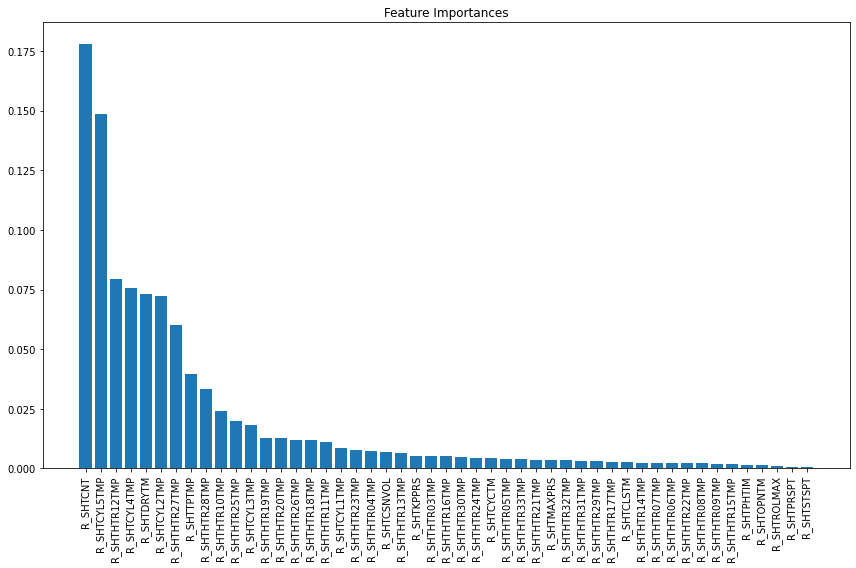

In [35]:
# Get the feature importances
importances = rf_classifier.feature_importances_

# Get the feature names
feature_names = X.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Print the top 10 features
print("Top 10 features:")
for i in range(10):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.3f}")

# Visualize the feature importances
plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()